# Imports

In [5]:
import cv2
import math
import numpy as np
from matplotlib import pyplot as plt


# Example CV2 Resize

In [6]:

img = cv2.imread('dataset/Spiral_HandPD/SpiralPatients/0002-1.jpg', cv2.IMREAD_UNCHANGED)
print(img.shape[0])
 
print('Original Dimensions : ',img.shape)
 
scale_percent = 50 # percent of original size
width = int(img.shape[1] * scale_percent / 100) # columns
height = int(img.shape[0] * scale_percent / 100) # rows
dim = (width, height)
  
# resize image
resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
 
print('Resized Dimensions : ',resized.shape)
 
print("Resized image")
cv2.imshow('RESIZED IMG', resized)
cv2.waitKey(0)
cv2.destroyAllWindows()



708
Original Dimensions :  (708, 720, 3)
Resized Dimensions :  (354, 360, 3)
Resized image


# Extract PEN

In [7]:
BLUR_RADIUS = 5


# carregando imagem
img = cv2.imread('dataset/Spiral_HandPD/SpiralPatients/0002-1.jpg',1) 
filter_blur_img = cv2.blur(img, (BLUR_RADIUS,BLUR_RADIUS))
filter_img = cv2.medianBlur(filter_blur_img, 11)

rows, cols= img.shape[:2]

width = 500
heigth = 500
dimension = (width, heigth)

# resize imagem
img = cv2.resize(filter_img, dimension, interpolation = cv2.INTER_AREA)
print('Resized dimension: ', img.shape)
rows, cols = img.shape[:2]

for x in range(0, rows -1):

  for y in range(0, cols -1):

    if img[x, y][0] > 200 and img[x, y][1] > 200 and img [x, y][2] > 200:
      img[x, y][0] = 255
      img[x, y][1] = 255
      img[x, y][2] = 255

#img_gray = cv2.cvtColor(img_resized, cv2.COLOR_RGB2GRAY)

# OPERAÇÃO 1
#EROSION_TYPE = 'MORPH_RECT' # MORPH_ELLIPSE; MORPH_RECT; MORPH_CROSS
erosion_type = 'MORPH_RECT' # MORPH_ELLIPSE; MORPH_RECT; MORPH_CROSS
erosion_size = 1 
element = cv2.getStructuringElement(
    cv2.MORPH_RECT  ,
    (2 * erosion_size + 1, 2 * erosion_size + 1),
    (erosion_size, erosion_size)
)

img = cv2.dilate(img, element)
img = cv2.dilate(img, element)
print('OPERAÇÃO 1')
cv2.imshow('OPERACAO1', img)

# OPERAÇÃO 2
erosion_size = 2

element1 = cv2.getStructuringElement(
    cv2.MORPH_RECT  ,
    (2 * erosion_size + 1, 2 * erosion_size + 1),
    (erosion_size, erosion_size)
)

img = cv2.erode(img, element1)
 
for y in range(0, rows -1):

  for x in range(0, cols -1 ):
    # TODO: DESCOBRIR O QUE SIGNIFICA ESSA OPERAÇAO
    difRG = abs(img[x,y][0] - img[x,y][1])
    difRB = abs(img[x,y][0] - img[x,y][2])
    difGB = abs(img[x,y][1] - img[x,y][2])

    if(difGB < 30 and difRB < 30 and difRG < 40):
      img[x,y][0] = 255
      img[x,y][1] = 255
      img[x,y][2] = 255

img = cv2.blur(img, (BLUR_RADIUS, BLUR_RADIUS))
img = cv2.medianBlur(img, 3)

cv2_imshow(img)



cv2.imwrite('exam_1', img)
cv2.waitKey(0)
cv2.destroyAllWindows()


Resized dimension:  (500, 500, 3)
OPERAÇÃO 1


/tmp/ipykernel_33339/2684808963.py:64: RuntimeWarning: overflow encountered in ubyte_scalars
  difGB = abs(img[x,y][1] - img[x,y][2])


NameError: name 'cv2_imshow' is not defined

# Extract Template

Mounted at /content/drive
255
255
255
--------------------OPERACAO 2--------------------
--------------------OPERACAO 3--------------------


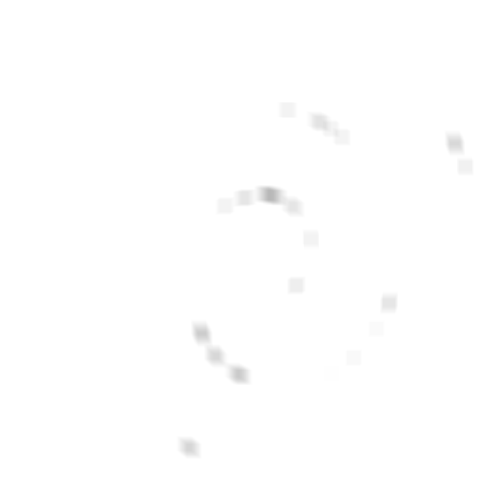

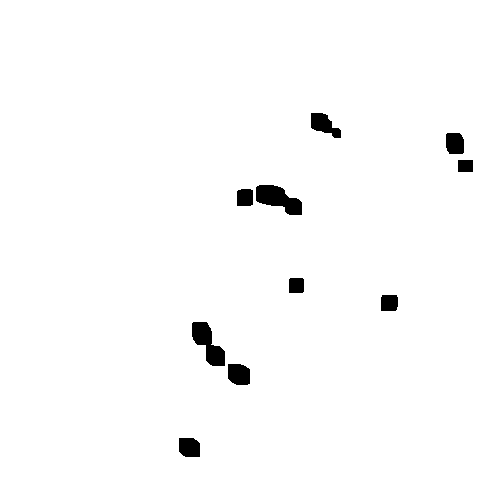

True

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

from google.colab import drive
from google.colab.patches import cv2_imshow
drive.mount('/content/drive', force_remount= True)

DATASET_DIR = 'content/drive/Mydrive/Colab Notebooks/dataset/'
BLUR_RADIUS = 5
WIDTH = 500
HEIGTH = 500
DIMENSION = (WIDTH, HEIGTH)

img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/dataset/extract_pen.jpg',1) 

# resize imagem
img = cv2.resize(img, DIMENSION, interpolation = cv2.INTER_AREA)
img = cv2.blur(img, (BLUR_RADIUS, BLUR_RADIUS))
#print('--------------------IMAGEM FILETER BLUR--------------------')

rows, cols = img.shape[:2]
print(img[0,0][0])
print(img[0,0][1])
print(img[0,0][2])
for x in range(0, rows -1):

  for y in range(0, cols -1):

    if img[x, y][0] < 120 and img[x, y][1] < 120 and img [x, y][2] < 120:
      img[x, y][0] = 0
      img[x, y][1] = 0
      img[x, y][2] = 0
    
    else:
      img[x, y][0] = 255
      img[x, y][1] = 255
      img[x, y][2] = 255


# OPERAÇÃO DE ABERTURA 
# Exemplo de uma funcao abertura 
#processing_img_open = cv2.morphologyEx(
#    img_resized,
#    cv2.MORPH_OPEN,
#    structuring_element
#)

# OPERACÃO 1

#print('--------------------OPERACAO 1--------------------')
erosion_type = 'MORPH_RECT'
erosion_size = 2

element = cv2.getStructuringElement(
    cv2.MORPH_RECT, (2 * erosion_size + 1, 2 * erosion_size + 1),
    ( erosion_size, erosion_size)
)
img = cv2.erode(img, element)

#cv2_imshow(img)

# OPERAÇÃO  2
print('--------------------OPERACAO 2--------------------')
erosion_size = 1
element1 = cv2.getStructuringElement(
    cv2.MORPH_RECT, (2 * erosion_size + 1, 2 * erosion_size + 1),
    ( erosion_size, erosion_size)
)
img = cv2.dilate(img, element1)
img = cv2.dilate(img, element1)

img = cv2.blur(img, (3 * BLUR_RADIUS, 3 * BLUR_RADIUS))

# OPERAÇÃO 3 COM IMAGEM CINZA

print('--------------------OPERACAO 3--------------------')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2_imshow(img_gray)
element2 = cv2.getStructuringElement(
    cv2.MORPH_RECT,
    (2 * erosion_size + 1, 2 * erosion_size + 1),
    (erosion_size, erosion_size)
)
# OTSU THRESHOLD IS USE TO REMOVE THE NOISE AND BACKGROUND
# PARAMETRO 1 : IMAGEM EM CINZA
# PARAMETRO 2 : VALOR LIMIAR, RESOLVIDO TENTATIVA E ERRO
# PARAMETRO 3 : INTENSIADADE QUE OS PIXELS VAO RECEBER NOS VALORES SUPERIOR AO LIMIAR
# PARAMETRO 3 : METODO QUE SERÁ APLICADO
ret, img_thresh = cv2.threshold(img_gray, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)  
img_thresh = cv2.dilate(img_thresh, element2)
img_thresh = cv2.dilate(img_thresh, element2)
img_thresh = cv2.erode(img_thresh, element2)
img_thresh = cv2.erode(img_thresh, element2)
img_thresh = cv2.erode(img_thresh, element2)
cv2_imshow(img_thresh)

cv2.imwrite('/content/drive/MyDrive/Colab Notebooks/dataset/extract_pen.jpg',
            img_thresh)


# Util Function

In [ ]:

# Verify the central pixel
def verify(img_, y, x):
  cont = 0
  for i in range(y-1, y+2):
    for j in range(x-1, x +2):
      if(img[i,j] == 0):
        cont += 1 

  return cont == 2

# rotation 
def rotation(vert, yp, xp, teta):
  xe = np.float128(((vert[x] - xp) * (math.cos(teta * math.pi/180))) -
                  ((vert[y] - yp) * (math.sin(teta * math.pi / 180)))) + xp
  ye = np.float128(((vert[x] - xp) * (math.sin(teta * math.pi/180))) +
                  ((vert[y] - yp) * (math.cos(teta * math.pi / 180)))) + yp
                
  vert = {x:xe, y:ye}
  


# find the spiral origem
def origem(img_, oy, ox):
  lines = int(oy + 100)
  cols = int(ox + 100)
  i, j = 0, 0
  com_line = int(oy - 100)
  com_col = int(ox - 100)

  for i in range(com_line, lines):
    for j in range(com_col, cols):
      if(img_[i,j] == 0):
        if(verify(img_,i, j)):
          ox = j
          oy = i

def invert(start , end):
  tmp = start
  start = end
  end = tmp


def lineIDDA(img , yi, xi, yf, xf, vetor):

  rows, cols = img.shape[:2]
  erro, q = 0, 0
  quantidade = 0
  deltax = xf - xi
  deltay = yf - yi
  list_vertices = []

  # When ys > ye the line is diagnoal to down. For this is
  # necessary invert the points
  # When deltax = 0 and deltay < 0, the line is in vertical
  # to down. For this is necessary invert ys with ye
  if((yi > yf) or ((deltax == 0) and (deltay < 0))):
    invert(xi, xf)
    invert(yi, yf)
    deltax = xf - xi
    deltay = yf - xi

  x = xi
  y = yi

  # 'quant' denotes the maximum number of ploted points
  if (abs(deltax) > abs(deltay)):
    quantidade = abs(deltax)
  else:
    quantidae = abs(deltay) 
  
  get_point = True
  entered = False
  finished = False
  walk = 1000 # clean more pixels
  try: 
    
    while q <= quantidade and walk: # While have points to plot

      if(x >= 0 and y >= 0 and x < cols and y < rows):
        
        if(not entered and img[y, x] == 0):  # find a spiral
          entered = True
          if(get_point):
            get_point = False
            vert.x = x
            vert.y = y
            list_vertices.append(vert)
          
          img[y, x] = 255

      if(entered):
        walk -= 1
        if(x >= 0 and y >= 0 and x < cols and y < rows):
          img[y, x] = 255 # Set the color white to avoid reprocessings

      if((deltax >= 0) and (deltay >= 0) and (deltax >= deltay)): # 1 oct
        if((erro < 0) or (deltay == 0)):
          x += 1
          erro = erro + deltay
        else:
          x += 1
          y += 1
          erro = erro + deltay - deltax
      elif ((deltax >= 0) and (deltay >= 0) and (deltay > deltax)): # 2 oct
        if (erro < 0):
          x += 1
          y += 1
          erro = erro + deltay - deltax
        else:
          y += 1
          erro = erro - deltax
      elif ((deltay >= 0) and (deltax < 0) and (-deltax >= deltay)): # 4 oct
        if((erro < 0) or (deltay == 0)):
          x += 1
          erro = erro + deltay
        else:
          x -= 1
          y += 1
          erro = erro + deltax + deltay
      elif ((deltay > 0) and (deltax < 0) and (deltay > -deltax)): # 3 oct
        if(erro < 0): 
          x -= 1
          y += 1
          erro = erro + deltax + deltay
        else:
          y += 1
          erro = erro + deltax
      elif ((deltay > 0) and (deltax < 0) and (deltay > -deltax)): # 8 oct
        if(erro < 0): 
          x -= 1
          erro = erro + deltay
        else:
          x += 1
          y -= 1
          erro = erro + abs(deltay) - deltax
      elif ((deltax >= 0) and (deltay < 0) and (-deltay > deltax)): # 7 oct
        if(erro < 0): 
          x += 1
          y -= 1
          erro = erro - deltay - deltax
        else:
          y -= 1
          erro = erro - deltax
      elif ((deltay < 0) and (deltax < 0) and (-deltay > -deltax)): # 3 oct
        if(erro < 0): 
          x -= 1
          y -= 1
          erro = erro + deltax - deltay
        else:
          y -= 1
          erro = erro + deltax
      elif ((deltay < 0) and (deltax < 0) and (-deltax >= -deltay)): # 4 oct
        if(erro < 0):
          x -= 1
          erro = erro - deltay
        else:
          x -= 1
          y += 1
          erro = erro + deltax - deltay
    
      q += int(1)
  except:
    print(f'Something else went wrong walk = {walk}, quantidade = {quantidade}')
    
    


    



  

# Main

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Something else went wrong walk = 1000, quantidade = 0
Something else went wrong walk = 1000, quantidade = 0
Something else went wrong walk = 1000, quantidade = 0
Something else went wrong walk = 1000, quantidade = 0
Something else went wrong walk = 1000, quantidade = 0
Something else went wrong walk = 1000, quantidade = 0
Something else went wrong walk = 1000, quantidade = 0
Something else went wrong walk = 1000, quantidade = 0
Something else went wrong walk = 1000, quantidade = 0
Something else went wrong walk = 1000, quantidade = 0
Something else went wrong walk = 1000, quantidade = 0
Something else went wrong walk = 1000, quantidade = 0
Something else went wrong walk = 1000, quantidade = 0
Something else went wrong walk = 1000, quantidade = 0
Something else went wrong walk = 1000, quantidade = 0
Something else went wrong walk = 1000, quantidade = 0
Something else went wrong walk = 1000

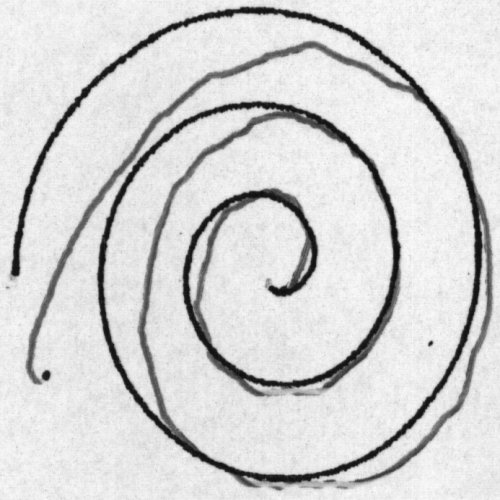

In [ ]:
!pip install  opencv-contrib-python
import numpy as np
import cv2


# lista de dicionarios com raio e angulo
radius_angle = []
radius_rigin = []
difradial = []
# lista de dicionarios com vertices x, y
ptos_original = []
ptos_desenhada = []
tremor_relativo = []

# lista de np.float(128)
tremor = []
# dicionario com valores de raios e anglus
ra = {"radius": 0, 'angle': 0}
ra_origin = {"radius": 0, 'angle': 0}

# recebe np.float128()
raiz, atangente = 0, 0

vert = {"x": 0, "y": 0}


WIDTH = 500
HEIGTH = 500
DIMENSION = (WIDTH, HEIGTH)

# resize imagem
img = cv2.imread(DATASET_PATH + '/exam_1.jpg', cv2.IMREAD_GRAYSCALE)
img = cv2.resize(img, DIMENSION, interpolation = cv2.INTER_AREA)
img1 = cv2.imread(DATASET_PATH + '/exam_1.jpg', cv2.IMREAD_GRAYSCALE)
img1 = cv2.resize(img1, DIMENSION, interpolation = cv2.INTER_AREA)


rows, cols = img.shape[:2]
# gray scale
#img_ = np.zeros((cols, rows), dtype='uint8')
img_ = img.copy()

#skinCrCbHist = np.zeros((256, 256, 1), dtype = "uint8")
retval, orig_thresh = cv2.threshold(img_, 220, 255, 0)
#retval, orig_thresh = cv2.threshold(img, 220, 255, cv2.THRESH_BINARY)
#Zhang Shuen
thinned = cv2.ximgproc.thinning(orig_thresh)

# Spiral pen
img1_ = img.copy()

nx = cols
ny = rows
retval1, orig_thresh1 = cv2.threshold(img1_, 220, 255, 0)
thinned1_ = cv2.ximgproc.thinning(img1_)
yc = rows / 2 # 370
xc = cols / 2 # 350

origem(img1_, yc, xc)

# Get points from spiral
for i in range(3):
  vert[y] = yc
  vert[x] = cols + 350 # pegar img inteira
  rotation(vert, yc, xc, 1)
  for i in range(360):
    pt_ori = len(ptos_original)
    pt_des = len(ptos_desenhada)
    rotation(vert, yc, xc, -1)

    lineIDDA(img1_, yc, xc, vert[y], vert[x], ptos_original)
    lineIDDA(img_, yc, xc, vert[y], vert[x], ptos_desenhada)

  
  yc = rows / 2 # 370
  xc = cols / 2 # 350

# Transformation to polar coordinates
for i in range(len(ptos_original)):

  raiz = (pto) 



print('IMG 1')
#cv2_imshow(thinned)
cv2_imshow(img)

<class 'numpy.ndarray'>


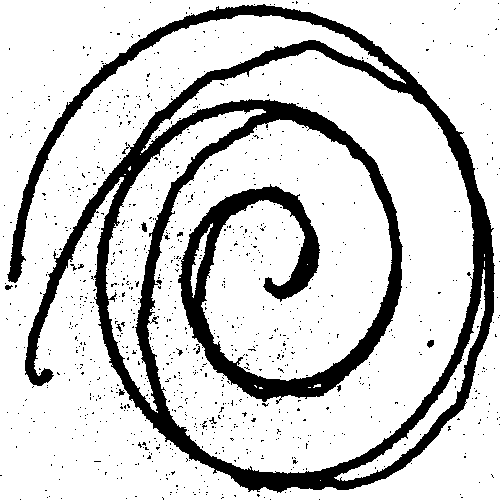

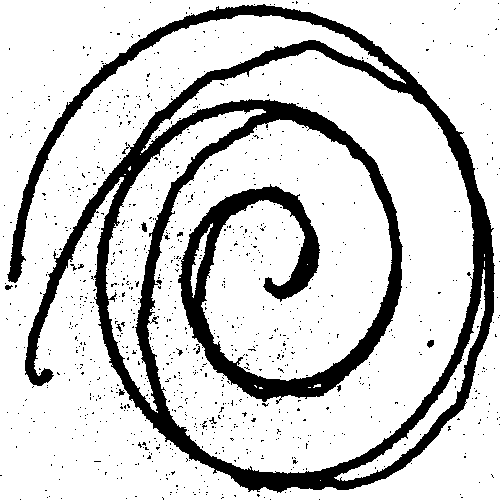

------------------------------------------------------------


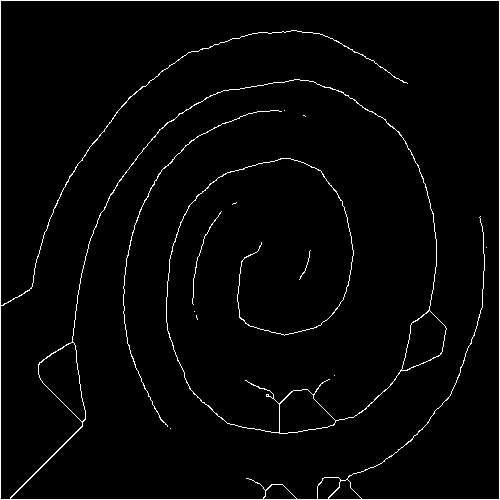

<function destroyAllWindows>

In [ ]:
# Read image
img = cv2.imread(DATASET_PATH + '/exam_1.jpg' , 0) # 0 = grayscale
print(type(img))

# Resize imagem
width = int(500)
height = int(500)
dimension = (width, height)
img = cv2.resize(img, dimension, interpolation = cv2.INTER_AREA)

retval, orig_thresh = cv2.threshold(img, 220, 255, cv2.THRESH_BINARY)
bin_thresh = (orig_thresh == 0).astype(int)

# pixel black = 1
# pixel whitte = 0
# steps one and two, condition one
def pixel_is_black(arr, x, y):
  ''' Function included for clarity'''

  if arr[x, y] == 1: return True
  
  return False

# steps one and two, condition two
def pixel_has_2_to_6_black_neighbors(arr, x, y):
  # pixel values can only be 0 or 1, so simply chech if sum of
  # neighbors is between 2 and 6
  if (2 <= arr[x, y-1] + arr[x+1, y-1] + arr[x+1, y] + arr[x+1, y+1] +
      arr[x, y+1] + arr[x-1, y+1] + arr[x-1, y] + arr[x-1, y-1] <= 6):
    
    return True
  
  return False

# steps one and two, condition three

def pixel_has_1_white_to_black_neighbor_transition(arr, x, y):
  # neighbors is a list of neighbor pixel values; neighbor P2 appears
  # twice since we will cycle around P1
  neighbors = [arr[x, y-1], arr[x+1, y-1], arr[x+1, y], arr[x+1, y+1],
      arr[x, y+1], arr[x-1, y+1], arr[x-1, y], arr[x-1, y-1]] 
  
  # zip returns iterator of tuples composed of a neighbor and next neighbor
  # we then check if the neigbor and next neighbor is a 0 -> transition
  # finally, we sum the transitions and return True if there is only one

  transitions =sum((a, b) == (0,1) for a, b in zip(neighbors, neighbors[1:]))

  if transitions == 1: 
    return True

  return False

# step one condition four
def at_least_one_one_of_P2_P4_P6_is_white(arr, x, y):
# if at least one p2, p4 or p6 is 0 (white), logic statement will
# evaluate to false
  if(arr[x, y-1] and arr[x+1, y] and arr[x, y+1]) == False:
    return True
  
  return False

# step one condition five
def at_least_one_of_p4_p6_p8_is_white(arr, x, y):
#if at least one of p4, p6 or 08 is 0(white), logic statement will
# evaluate to false
  if(arr[x+1, y] and arr[x, y+1] and arr[x-1, y] == False):
    return True

  return False


# step two condition four
def at_least_one_of_p2_p4_p8_is_white(arr, x, y):
  # if at at least one of p2, p4, p8 is 0 (white), logic statement will 
# evaluate to false
  if(arr[x, y-1] and arr[x+1, y] and[x-1, y] == False):
    return True

  return False

# step two condition five
def at_least_one_of_p2_p6_p8_is_white(arr, x, y):
# if at least one of p2, p6 or p8 is 0 (white), logic statement will
# evaluate to false

  if(arr[x, y-1] and arr[x, y+1] and[x-1, y] == False):
    return True

  return


# make a copy of the binary threshold array, upon which we will apply
# the thinning algorith

thinned_thresh = bin_thresh.copy()

# if the thinned threshold reaches a steady state, we'll break out of the loop

while 1:
  # make a copy of the thinned threshold array to check for changes
  thresh_copy = thinned_thresh.copy()
  
  # step one
  pixel_meeting_criteria = []

  # check all pixels except for border and corner pixels
  # if a pixel meets all criteira, add it pixel_meeting_criteira list

  for i in range(1, thinned_thresh.shape[0] -1): # rows
    for j in range(1, thinned_thresh.shape[1] - 1): # cols
      if(pixel_is_black(thinned_thresh, i, j) and 
         pixel_has_2_to_6_black_neighbors(thinned_thresh, i, j) and 
         pixel_has_1_white_to_black_neighbor_transition(thinned_thresh, i, j) and 
         at_least_one_one_of_P2_P4_P6_is_white(thinned_thresh, i, j) and 
         at_least_one_of_p2_p6_p8_is_white(thinned_thresh, i, j)):  

         pixel_meeting_criteria.append((i,j))

  # change noted pixels in thinned threshold array ti 0 (white)
  for pixel in pixel_meeting_criteria:
    thinned_thresh[pixel] = 0

  # step two
  pixel_meeting_criteria = []
  # check all pixels except for border and corner pixels
  # if a pixel meets all criteria, add it to pixels_meeting_criteria

  for i in range(1, thinned_thresh.shape[0] - 1):
    for j in range(1, thinned_thresh.shape[1] - 1):
      if(pixel_is_black(thinned_thresh, i, j) and
         pixel_has_2_to_6_black_neighbors(thinned_thresh, i, j)and 
         pixel_has_1_white_to_black_neighbor_transition(thinned_thresh, i, j) and
         at_least_one_of_p2_p4_p8_is_white(thinned_thresh, i, j) and
         at_least_one_of_p2_p6_p8_is_white(thinned_thresh, i, j)):
        
        pixel_meeting_criteria.append((i,j))

  # changed noted pixels in thinned threshold array to 0(white)
  for pixel in pixel_meeting_criteria:
    thinned_thresh[pixel] = 0

  # if the latest iteration didn't make any difference, exit loop
  if np.all(thresh_copy == thinned_thresh) == True:
    break


#  Convert all ones (black pixels) to zeroes, and all zeroes (whites pixels) to ones
thresh = (thinned_thresh == 0).astype(np.uint8)

# Convert ones to 255
thresh *= 255

# display original and thinned images)
cv2_imshow(orig_thresh)
cv2_imshow(thresh)
print('------------------------------------------------------------')
thinned = cv2.ximgproc.thinning(img)
cv2_imshow(thinned)

cv2.waitKey(0)
cv2.destroyAllWindows



         
         





```
# This is formatted as code
```

# Extract Feats
The Zhang Suen Thinning Algorithm

<class 'numpy.ndarray'>


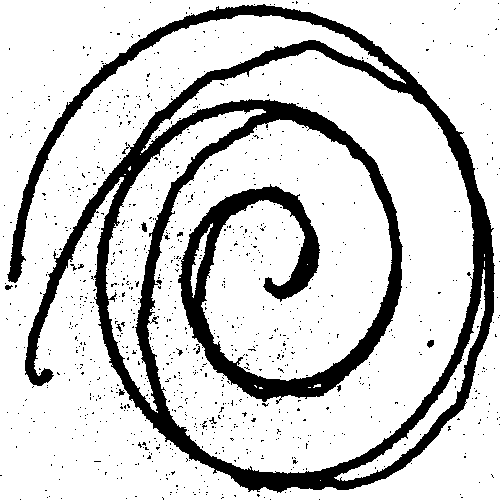

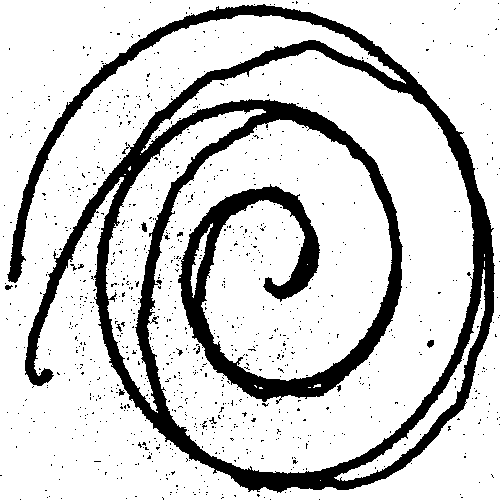

------------------------------------------------------------


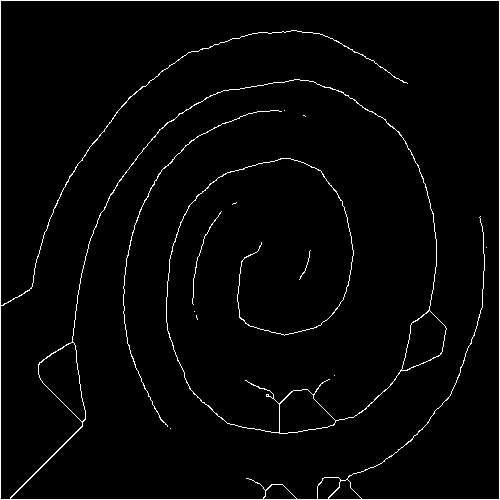

<function destroyAllWindows>

In [ ]:
# Read image
img = cv2.imread(DATASET_PATH + '/exam_1.jpg' , 0) # 0 = grayscale
print(type(img))

# Resize imagem
width = int(500)
height = int(500)
dimension = (width, height)
img = cv2.resize(img, dimension, interpolation = cv2.INTER_AREA)

retval, orig_thresh = cv2.threshold(img, 220, 255, cv2.THRESH_BINARY)
bin_thresh = (orig_thresh == 0).astype(int)

# pixel black = 1
# pixel whitte = 0
# steps one and two, condition one
def pixel_is_black(arr, x, y):
  ''' Function included for clarity'''

  if arr[x, y] == 1: return True
  
  return False

# steps one and two, condition two
def pixel_has_2_to_6_black_neighbors(arr, x, y):
  # pixel values can only be 0 or 1, so simply chech if sum of
  # neighbors is between 2 and 6
  if (2 <= arr[x, y-1] + arr[x+1, y-1] + arr[x+1, y] + arr[x+1, y+1] +
      arr[x, y+1] + arr[x-1, y+1] + arr[x-1, y] + arr[x-1, y-1] <= 6):
    
    return True
  
  return False

# steps one and two, condition three

def pixel_has_1_white_to_black_neighbor_transition(arr, x, y):
  # neighbors is a list of neighbor pixel values; neighbor P2 appears
  # twice since we will cycle around P1
  neighbors = [arr[x, y-1], arr[x+1, y-1], arr[x+1, y], arr[x+1, y+1],
      arr[x, y+1], arr[x-1, y+1], arr[x-1, y], arr[x-1, y-1]] 
  
  # zip returns iterator of tuples composed of a neighbor and next neighbor
  # we then check if the neigbor and next neighbor is a 0 -> transition
  # finally, we sum the transitions and return True if there is only one

  transitions =sum((a, b) == (0,1) for a, b in zip(neighbors, neighbors[1:]))

  if transitions == 1: 
    return True

  return False

# step one condition four
def at_least_one_one_of_P2_P4_P6_is_white(arr, x, y):
# if at least one p2, p4 or p6 is 0 (white), logic statement will
# evaluate to false
  if(arr[x, y-1] and arr[x+1, y] and arr[x, y+1]) == False:
    return True
  
  return False

# step one condition five
def at_least_one_of_p4_p6_p8_is_white(arr, x, y):
#if at least one of p4, p6 or 08 is 0(white), logic statement will
# evaluate to false
  if(arr[x+1, y] and arr[x, y+1] and arr[x-1, y] == False):
    return True

  return False


# step two condition four
def at_least_one_of_p2_p4_p8_is_white(arr, x, y):
  # if at at least one of p2, p4, p8 is 0 (white), logic statement will 
# evaluate to false
  if(arr[x, y-1] and arr[x+1, y] and[x-1, y] == False):
    return True

  return False

# step two condition five
def at_least_one_of_p2_p6_p8_is_white(arr, x, y):
# if at least one of p2, p6 or p8 is 0 (white), logic statement will
# evaluate to false

  if(arr[x, y-1] and arr[x, y+1] and[x-1, y] == False):
    return True

  return


# make a copy of the binary threshold array, upon which we will apply
# the thinning algorith

thinned_thresh = bin_thresh.copy()

# if the thinned threshold reaches a steady state, we'll break out of the loop

while 1:
  # make a copy of the thinned threshold array to check for changes
  thresh_copy = thinned_thresh.copy()
  
  # step one
  pixel_meeting_criteria = []

  # check all pixels except for border and corner pixels
  # if a pixel meets all criteira, add it pixel_meeting_criteira list

  for i in range(1, thinned_thresh.shape[0] -1): # rows
    for j in range(1, thinned_thresh.shape[1] - 1): # cols
      if(pixel_is_black(thinned_thresh, i, j) and 
         pixel_has_2_to_6_black_neighbors(thinned_thresh, i, j) and 
         pixel_has_1_white_to_black_neighbor_transition(thinned_thresh, i, j) and 
         at_least_one_one_of_P2_P4_P6_is_white(thinned_thresh, i, j) and 
         at_least_one_of_p2_p6_p8_is_white(thinned_thresh, i, j)):  

         pixel_meeting_criteria.append((i,j))

  # change noted pixels in thinned threshold array ti 0 (white)
  for pixel in pixel_meeting_criteria:
    thinned_thresh[pixel] = 0

  # step two
  pixel_meeting_criteria = []
  # check all pixels except for border and corner pixels
  # if a pixel meets all criteria, add it to pixels_meeting_criteria

  for i in range(1, thinned_thresh.shape[0] - 1):
    for j in range(1, thinned_thresh.shape[1] - 1):
      if(pixel_is_black(thinned_thresh, i, j) and
         pixel_has_2_to_6_black_neighbors(thinned_thresh, i, j)and 
         pixel_has_1_white_to_black_neighbor_transition(thinned_thresh, i, j) and
         at_least_one_of_p2_p4_p8_is_white(thinned_thresh, i, j) and
         at_least_one_of_p2_p6_p8_is_white(thinned_thresh, i, j)):
        
        pixel_meeting_criteria.append((i,j))

  # changed noted pixels in thinned threshold array to 0(white)
  for pixel in pixel_meeting_criteria:
    thinned_thresh[pixel] = 0

  # if the latest iteration didn't make any difference, exit loop
  if np.all(thresh_copy == thinned_thresh) == True:
    break


#  Convert all ones (black pixels) to zeroes, and all zeroes (whites pixels) to ones
thresh = (thinned_thresh == 0).astype(np.uint8)

# Convert ones to 255
thresh *= 255

# display original and thinned images)
cv2_imshow(orig_thresh)
cv2_imshow(thresh)
print('------------------------------------------------------------')
thinned = cv2.ximgproc.thinning(img)
cv2_imshow(thinned)

cv2.waitKey(0)
cv2.destroyAllWindows



         
         

